# Population dans les municipalitées du Québec

## Objectifs

* Lire des données
* Faire des manipulations pour nettoyer les données
* Sélectionner l'information
* Faire des opérations et des analyses statistiques
* Faire des tracés

## Instructions

* Population dans les municipalités du Québec [Recensement de 2016 et 2021, Statistiques Canada](https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/index-eng.cfm)
* Identifier les 10 villes qui ont la plus forte augmentation de population entre 2016 et 2021

In [147]:
import pandas as pd
import numpy as np

## Base de donnees issue de Statistiques Canada
Tableau 98-10-0002-02  Chiffres de population et des logements : Canada, provinces et territoires, et subdivisions de recensement (municipalités)"
* https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=9810000202

En français sans les symboles pour le QUEBEC
Pour les besoin du cours :
* Index multilignes modifies
* en-tete et pied de page supprimes

* delimiter ";" et non virgules car en francais
* decimal "," virgule en francais et non point
* thousands " " espace en francais et non virgule
* usecols pour ne conserver que les valeurs pertinentes

In [148]:
#df = pd.read_csv('9810000202-sanssymbole-mod.csv',delimiter=';',decimal=',',thousands=' ',usecols=(0,1,2,3,11))
df = pd.read_csv('9810000202-sanssymbole-mod.csv',delimiter=';',decimal=',',thousands=' ')
df.head()

,Nom géographique,Abréviation du nom du genre de région géographique,"Population, 2021","Population, 2016","Variation en pourcentage de la population, 2016 à 2021","Total des logements privés, 2021","Total des logements privés, 2016","Variation en pourcentage du total des logements privés, 2016 à 2021","Logements privés occupés par des résidents habituels, 2021","Logements privés occupés par des résidents habituels, 2016","Variation en pourcentage des logements privés occupés par des résidents habituels, 2016 à 2021","Superficie des terres en kilomètres carrés, 2021","Densité de population au kilomètre carré, 2021","Classement national de la population, 2021","Classement provincial et territorial de la population, 2021"
0,Canada,Pays,36 991 981,35 151 728,"5,2",16 284 235,15 412 443,"5,7",14 978 941,14 072 079,"6,4",8788702.80,"4,2",...,...
1,Québec,PR,8 501 833,8 164 361,"4,1",4 050 164,3 858 943,"5,0",3 749 035,3 531 663,"6,2",1298599.75,"6,5",...,...
2,Amos,V,12 675,12 823,"-1,2",6 051,5 910,"2,4",5 760,5 628,"2,3",429.04,"29,5",341,90
3,Barraute,MÉ,1 986,1 968,"0,9",1 012,953,"6,2",930,895,"3,9",493.04,"4,0",1 388,408
4,Berry,MÉ,535,538,"-0,6",283,264,"7,2",232,215,"7,9",575.07,"0,9",2 859,901


Avant traitement, liste des colonnes:

In [149]:
df.columns

Index(['Nom géographique',
       'Abréviation du nom du genre de région géographique',
       'Population, 2021', 'Population, 2016',
       'Variation en pourcentage de la population, 2016 à 2021',
       'Total des logements privés, 2021', 'Total des logements privés, 2016',
       'Variation en pourcentage du total des logements privés, 2016 à 2021',
       'Logements privés occupés par des résidents habituels, 2021',
       'Logements privés occupés par des résidents habituels, 2016',
       'Variation en pourcentage des logements privés occupés par des résidents habituels, 2016 à 2021',
       'Superficie des terres en kilomètres carrés, 2021',
       'Densité de population au kilomètre carré, 2021',
       'Classement national de la population, 2021',
       'Classement provincial et territorial de la population, 2021'],
      dtype='object')

Il y a beaucoup trop de colonnes dont nous n'avons pas besoin. Nous allons nous en débarasser, pour cela, nous allons utiliser la fonction `.drop()` de pandas.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

On ne conserve que les donnees de population et la superficie, supression des colonnes non pertinentes:


In [150]:
cols = list(df.columns)
print("Columns as list:", cols)
cols_to_drop = cols[4:11] + cols[12:]
print("Colonnes à enlever:\n", cols_to_drop )
df.drop(axis=1,columns=cols_to_drop,inplace=True)
df.columns

Columns as list: ['Nom géographique', 'Abréviation du nom du genre de région géographique', 'Population, 2021', 'Population, 2016', 'Variation en pourcentage de la population, 2016 à 2021', 'Total des logements privés, 2021', 'Total des logements privés, 2016', 'Variation en pourcentage du total des logements privés, 2016 à 2021', 'Logements privés occupés par des résidents habituels, 2021', 'Logements privés occupés par des résidents habituels, 2016', 'Variation en pourcentage des logements privés occupés par des résidents habituels, 2016 à 2021', 'Superficie des terres en kilomètres carrés, 2021', 'Densité de population au kilomètre carré, 2021', 'Classement national de la population, 2021', 'Classement provincial et territorial de la population, 2021']
Colonnes à enlever:
 ['Variation en pourcentage de la population, 2016 à 2021', 'Total des logements privés, 2021', 'Total des logements privés, 2016', 'Variation en pourcentage du total des logements privés, 2016 à 2021', 'Logements 

Index(['Nom géographique',
       'Abréviation du nom du genre de région géographique',
       'Population, 2021', 'Population, 2016',
       'Superficie des terres en kilomètres carrés, 2021'],
      dtype='object')

Nous allons ensuite renommer les colonnes pour se faciliter la tâche:

In [151]:
df.columns = ['Nom','Type','Pop21','Pop16','Km2']
df.head()

,Nom,Type,Pop21,Pop16,Km2
0,Canada,Pays,36 991 981,35 151 728,8788702.80
1,Québec,PR,8 501 833,8 164 361,1298599.75
2,Amos,V,12 675,12 823,429.04
3,Barraute,MÉ,1 986,1 968,493.04
4,Berry,MÉ,535,538,575.07


On va regarder le type de chaque colonne pour savoir à quoi nous avons à faire:

In [152]:
for col in df.columns:
    print(col,df[col].dtype)
print('\n')

Nom object
Type object
Pop21 object
Pop16 object
Km2 float64




Les colonnes de population ne sont pas reconnues comme des nombres alors que ce sont des nombres à cause des espaces... Nous allons nous débarasser des espaces en appliquant une lambda aux séries (colonnes), pour cela, nous allons utiliser df.apply():

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [153]:
for col in ['Pop21','Pop16']:
    df[col] = df[col].apply(lambda x: x.replace(' ',''))
df.dtypes

Nom       object
Type      object
Pop21     object
Pop16     object
Km2      float64
dtype: object

Nous allons maintenant convertir les données en décimaux, mais si on essaie de le faire, on obtient une erreur car certaines des valeurs dans la colonne sont des "..". Ce symbole a été choisi pour désigner les municipalitées pour lesquelles les valeurs ne sont pas disponibles. Nous allons devoir remplacer ces valeurs par des NaN. Le type NaN est disponible dans numpy, nous allons pour cela utiliser df.replace():

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [154]:
df = df.replace('..', np.nan)

On peut maintenant convertir nos colonnes de population en décimaux:

In [155]:
for col in ['Pop21','Pop16']:
    df[col] = df[col].astype(float)
print(df.head())
print("\n",df.dtypes)
print(df.describe())

        Nom  Type       Pop21       Pop16         Km2
0    Canada  Pays  36991981.0  35151728.0  8788702.80
1    Québec    PR   8501833.0   8164361.0  1298599.75
2      Amos     V     12675.0     12823.0      429.04
3  Barraute    MÉ      1986.0      1968.0      493.04
4     Berry    MÉ       535.0       538.0      575.07

 Nom       object
Type      object
Pop21    float64
Pop16    float64
Km2      float64
dtype: object
              Pop21         Pop16           Km2
count  1.276000e+03  1.280000e+03  1.284000e+03
mean   4.231634e+04  4.022037e+04  8.867525e+03
std    1.063614e+06  1.009701e+06  2.481656e+05
min    0.000000e+00  0.000000e+00  4.000000e-02
25%    4.530000e+02  4.480000e+02  5.495750e+01
50%    1.058500e+03  1.020000e+03  9.770000e+01
75%    2.638000e+03  2.540250e+03  1.922775e+02
max    3.699198e+07  3.515173e+07  8.788703e+06


Nous avons enfin des données propres à utiliser!

On peut enfin sauver nos données dans un fichier .csv pour pouvoir le réutiliser à l'avenir:

In [156]:
df.to_csv('Census_2016_2021.csv')

## Calcul de l'accroissement

On s'intéresse maintenant seulement aux villes.  
Dans notre fichier, les villes ont un "V" à la colonne "Type". Nous allons donc créer un nouveau dataframe qui contient seulement les lignes correspondant à des villes.


In [157]:
# df_villes = df[df['Type'] == 'V'].reset_index(drop=True)
df_villes = df[df['Type'] == 'V']
df_villes.head()

,Nom,Type,Pop21,Pop16,Km2
2,Amos,V,12675.0,12823.0,429.04
27,Duparquet,V,716.0,666.0,121.17
31,La Sarre,V,7358.0,7282.0,148.36
33,Macamic,V,2744.0,2751.0,202.05
45,Acton Vale,V,7605.0,7656.0,91.01


On va maintenant ajouter une colonne qui calcule le pourcentage d'accroissement pour chaque ville entre 2021 et 2016 selon:

Accroissement = $100*\frac{(Pop_{2021}-Pop_{2016})}{Pop_{2016}}$

In [158]:
df_villes['PctAcc'] = 100 * (df_villes['Pop21'] - df_villes['Pop16'])/df_villes['Pop16']
df_villes.head()

<ipython-input-158-921de5564224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_villes['PctAcc'] = 100 * (df_villes['Pop21'] - df_villes['Pop16'])/df_villes['Pop16']


,Nom,Type,Pop21,Pop16,Km2,PctAcc
2,Amos,V,12675.0,12823.0,429.04,-1.154176
27,Duparquet,V,716.0,666.0,121.17,7.507508
31,La Sarre,V,7358.0,7282.0,148.36,1.043669
33,Macamic,V,2744.0,2751.0,202.05,-0.254453
45,Acton Vale,V,7605.0,7656.0,91.01,-0.666144


On classe les villes par ordre d'accroissement du plus grand au plus petit avec df.sort_values():

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [159]:
df_villes_Acc = df_villes.sort_values('PctAcc',ascending=False)
df_villes_Acc.head()

,Nom,Type,Pop21,Pop16,Km2,PctAcc
966,L'Île-Dorval,V,30.0,5.0,0.19,500.000000
1205,Schefferville 5,V,244.0,130.0,24.76,87.692308
744,Barkmere,V,81.0,58.0,17.72,39.655172
782,Estérel,V,262.0,196.0,12.62,33.673469
190,Bromont,V,11357.0,9041.0,114.05,25.616635


On se retrouve avec des municipalitées qui ont des accroissement énormes car la population était toute petite.. On va ajouter une condition alors, on va garder seulement les villes qui ont plus de 5000 habitants en 2021. On utilise un simple filtre pour ça.

In [160]:
df_villes_Acc = df_villes_Acc[df_villes_Acc['Pop21'] > 5000]
df_villes_Acc.head()

,Nom,Type,Pop21,Pop16,Km2,PctAcc
190,Bromont,V,11357.0,9041.0,114.05,25.616635
535,Carignan,V,11740.0,9462.0,62.07,24.075248
934,Mirabel,V,61108.0,50513.0,484.09,20.974799
1182,Saint-Philippe,V,7597.0,6320.0,61.96,20.205696
834,Contrecoeur,V,9480.0,7887.0,62.20,20.197794


On a enfin notre dataframe avec les données souhaitées! On va maintenant prendre les 15 premières valeurs et en faire un graphique. On va pour cela utilise iloc.

iloc va nous permettre de sélectionner des lignes par indice: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
La syntaxe est similaire au tranchage avec numpy.

In [161]:
df_top15 = df_villes_Acc.iloc[:15,:]

On peut maintenant tracer les valeurs:

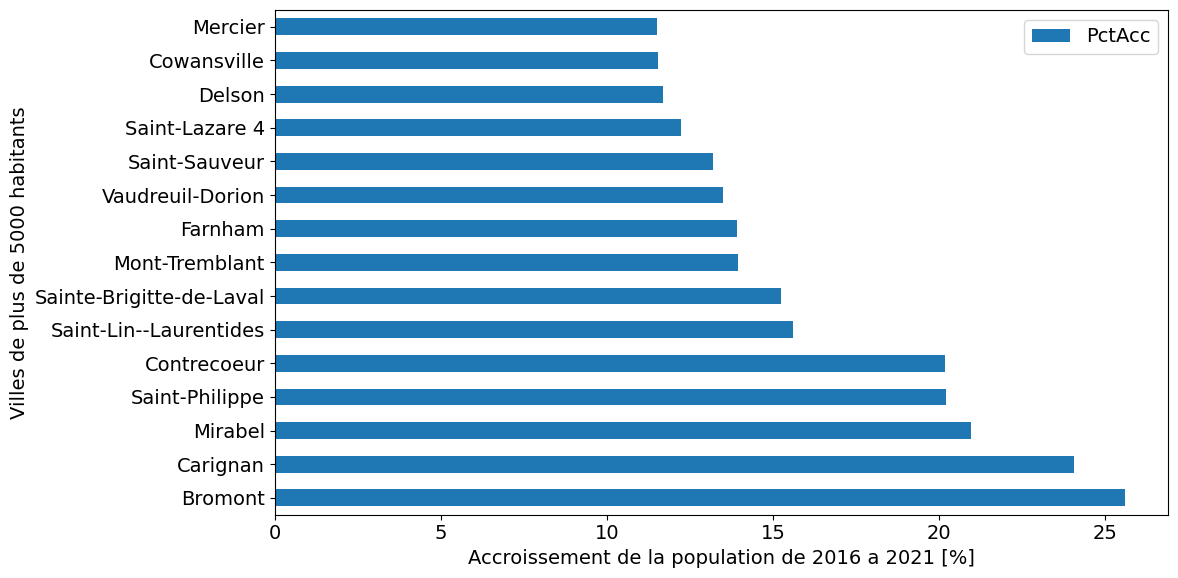

In [162]:
import matplotlib.pyplot as plt

plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12,6)
df_top15.plot(kind='barh',y='PctAcc',x='Nom')
plt.xlabel('Accroissement de la population de 2016 a 2021 [%]')
plt.ylabel('Villes de plus de 5000 habitants')
plt.show()